In [30]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [16]:
function hadamard_gen_TEST(n::Int)
    if !(n % 4 == 0 || n == 1 || n == 2)
        throw("argument must be divisible by 4 (or equal to 1 or 2)")
    end
    k = Integer(log(n)/log(2))
    global H = [1]
    for i in 1:k
        r1 = hcat(H,H)
        r2 = hcat(H,-1 .* H)
        H_n = vcat(r1,r2)
        H = H_n
    end
    
    return H
end

hadamard_gen_TEST (generic function with 1 method)

In [68]:
had = hadamard_gen(16)
pretty_table(had)
s =  Integer(sqrt(size(had,1)))
ims = []
for r in eachrow(had)
    i = reshape(r,s,s)
    push!(ims, i)
    pretty_table(i)
end
println(length(ims))

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │ Col. 11 │ Col. 12 │ Col. 13 │ Col. 14 │ Col. 15 │ Col. 16 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │       1 │       1 │       1 │       1 │       1 │       1 │
│      1 │     -1 │      1 │     -1 │      1 │     -1 │      1 │     -1 │      1 │      -1 │       1 │      -1 │       1 │      -1 │       1 │      -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │       1 │      -1 │      -1 │       1 │       1 │      -1 │      -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │

In [18]:
function orthogonal_image_generator(n::Int)::Vector{Matrix{Int64}}
    had = hadamard_gen(n)
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end

function orthogonal_image_generator(hada::Matrix)::Vector{Matrix{Int64}}
    had = hada
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end



orthogonal_image_generator (generic function with 2 methods)

In [19]:
orthogonal_image_generator(16)

16-element Vector{Matrix{Int64}}:
 [1 1 1 1; 1 1 1 1; 1 1 1 1; 1 1 1 1]
 [1 1 1 1; -1 -1 -1 -1; 1 1 1 1; -1 -1 -1 -1]
 [1 1 1 1; 1 1 1 1; -1 -1 -1 -1; -1 -1 -1 -1]
 [1 1 1 1; -1 -1 -1 -1; -1 -1 -1 -1; 1 1 1 1]
 [1 -1 1 -1; 1 -1 1 -1; 1 -1 1 -1; 1 -1 1 -1]
 [1 -1 1 -1; -1 1 -1 1; 1 -1 1 -1; -1 1 -1 1]
 [1 -1 1 -1; 1 -1 1 -1; -1 1 -1 1; -1 1 -1 1]
 [1 -1 1 -1; -1 1 -1 1; -1 1 -1 1; 1 -1 1 -1]
 [1 1 -1 -1; 1 1 -1 -1; 1 1 -1 -1; 1 1 -1 -1]
 [1 1 -1 -1; -1 -1 1 1; 1 1 -1 -1; -1 -1 1 1]
 [1 1 -1 -1; 1 1 -1 -1; -1 -1 1 1; -1 -1 1 1]
 [1 1 -1 -1; -1 -1 1 1; -1 -1 1 1; 1 1 -1 -1]
 [1 -1 -1 1; 1 -1 -1 1; 1 -1 -1 1; 1 -1 -1 1]
 [1 -1 -1 1; -1 1 1 -1; 1 -1 -1 1; -1 1 1 -1]
 [1 -1 -1 1; 1 -1 -1 1; -1 1 1 -1; -1 1 1 -1]
 [1 -1 -1 1; -1 1 1 -1; -1 1 1 -1; 1 -1 -1 1]

In [52]:
sim_time = 1
steps = 500
im_all = orthogonal_image_generator(16)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
s = [1,2,3,4,5,6]
for t in s
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(2,2,-1),(1,2,1)]
)
println(length(parameters["images"]))

16
6


[-2.0, -2.0, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, -6.0, -2.0, -2.0, 2.0, -6.0, -2.0, -2.0, 2.0, -2.0, -6.0, 2.0, -2.0, -2.0, -2.0, -6.0, 2.0, -2.0, -2.0, -2.0, 2.0, -6.0, -2.0, -2.0, 2.0, -2.0, 2.0, -6.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, -6.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, -6.0, 2.0, -2.0, -2.0]


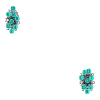

In [53]:
# Graph Checker
graph = get_HN_graph(parameters["images"],-1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]
println(elabels)
# Plot with edge labels
gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [54]:
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len6_t2")

┌────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │
├────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┘
File 8by8_1_len6_t2.dat is generated


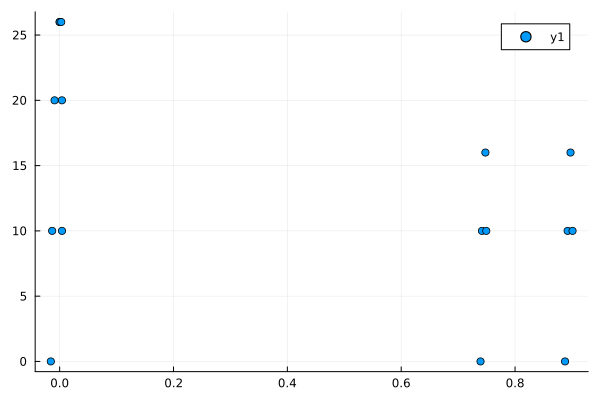

In [55]:
HN_cut_plotter(parameters, res[1])

In [56]:
sol_finder(res[1], parameters)

FOUND
┌────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │
├────────┼────────┼────────┼────────┤
│     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┘


1-element Vector{Any}:
 (Int8[-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1], [0.09905579304579248, 0.11629679881465638, -0.9903807809634673, 0.8600727897403657, 0.11218935842193067, 0.11218935842193067, -1.0, 0.8540681724147103, 0.1162148696159937, 0.09668319142232162, -0.995457281688592, 0.8515281333575444, 0.11490317936474637, 0.10326148683161529, -0.9868329092341077, 0.8616029239345315])

In [67]:
rots = iterative_rotater_list(res[1], [0.8878106415780694, -0.015506166999609161, 0.7393387749356137], 4, true)
for i in 1:length(rots)
    println(Dice.cut(graph, rots[i][1]))
end
for i in parameters["images"]
    pretty_table(i)
end

rotated by 0.8878106415780694
┌────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │
├────────┼────────┼────────┼────────┤
│     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┘
rotated by -0.015506166999609161
┌────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │
├────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┘
rotated by 0.7393387749356137
┌────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │
├────────┼────────┼────────┼────────┤
│     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴─────

In [58]:

function HN_cut_plotter_TEST(params, state, debug = false)
    rot = iterative_rotater_state(state,params)
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = Plots.scatter(x,y)
    if debug
        x_p = p[1][1][:x]
        y_p = p[1][1][:y]
        for i in 1:length(x_p)
            println("($(x_p[i]),$(y_p[i]))")
        end
    end
    return p
end

HN_cut_plotter_TEST (generic function with 2 methods)

(-0.01313356537613826,10.0)
(0.0041074403927255955,10.0)
(0.8974298606146018,16.0)
(0.747883431318435,16.0)
(0.0,26.0)
(0.0,26.0)
(0.8878106415780694,0.0)
(0.7418788139927797,10.0)
(0.004025511194062938,20.0)
(-0.015506166999609161,0.0)
(0.8923533598894773,10.0)
(0.7393387749356137,0.0)
(0.002713820942815661,26.0)
(-0.008927871590315474,20.0)
(0.9009777323439616,10.0)
(0.7494135655126009,10.0)


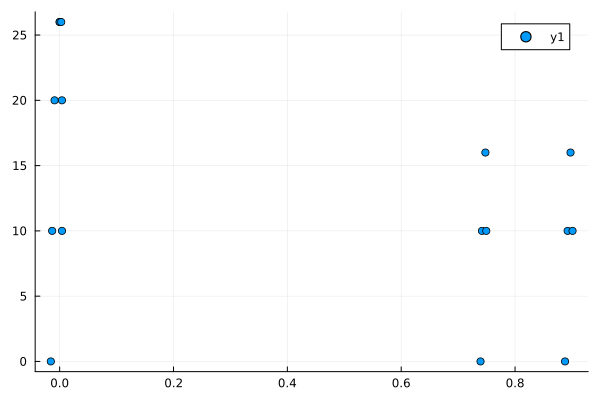

In [59]:
HN_cut_plotter_TEST(parameters, res[1], true)